In [1]:
from sklearn.datasets import load_iris

In [2]:
iris = load_iris()

In [3]:
import pymc3

In [4]:
import theano.tensor as tht
import numpy as np

In [96]:
N, d = iris['data'].shape # N: number of data points, d: dimension
k = 3 # number of clusters
model = pymc3.Model() # our model
with model:
    # cluster means
    means = pymc3.Normal('means', mu=[np.zeros(d)]*k, shape=(k,d))
    # probability of each cluster
    # p = pymc3.Dirichlet('p', a=np.array([1.]*k), shape=(k,))
    # making sure each cluster contains at least 10% of the points
    #p_min_potential = pymc3.Potential('p_min_potential', tht.switch(tht.min(p) < .1, -np.inf, 0))
    # cluster label for each point
    category = pymc3.Categorical('category', p=[1/3]*3, shape=N)
    # the observations come in here
    points = pymc3.MvNormal('obs',
                       mu=means[category],
                       tau=0.1*np.eye(d),
                       observed=iris['data'])

In [98]:
with model:
    step1 = pymc3.Metropolis(vars=[means])
    step2 = pymc3.ElemwiseCategorical(vars=[category], values=list(range(k)))
    tr = pymc3.sample(5000, step=[step1, step2])

/Users/dirk/.venv/p3/lib/python3.6/site-packages/ipykernel_launcher.py:3: DeprecationWarning: ElemwiseCategorical is deprecated, switch to CategoricalGibbsMetropolis.
  This is separate from the ipykernel package so we can avoid doing imports until
Multiprocess sampling (4 chains in 4 jobs)
CompoundStep
>Metropolis: [means]
>ElemwiseCategorical: [category]
Sampling 4 chains: 100%|██████████| 22000/22000 [00:40<00:00, 545.28draws/s]
The estimated number of effective samples is smaller than 200 for some parameters.


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x12ce62358>,
      dtype=object)

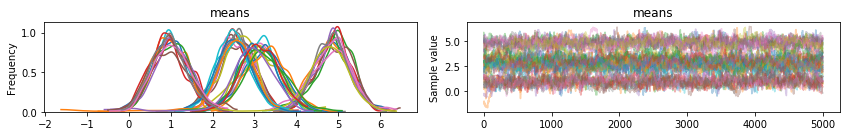

In [99]:
pymc3.plots.traceplot(tr, ['means'])

In [81]:
from sklearn.cluster import KMeans

In [82]:
model = KMeans(3).fit(iris['data'])

In [83]:
model.cluster_centers_

array([[5.9016129 , 2.7483871 , 4.39354839, 1.43387097],
       [5.006     , 3.418     , 1.464     , 0.244     ],
       [6.85      , 3.07368421, 5.74210526, 2.07105263]])

In [100]:
np.mean(tr['means'][200:], axis=0)

array([[4.86654453, 2.53419266, 3.14518026, 0.96050286],
       [4.87477286, 2.5766749 , 3.17256324, 1.01187526],
       [4.8143676 , 2.50772265, 3.05658079, 0.99766266]])